In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# READ COVERAGE

In [104]:
root_dir = '/scratch/indikar_root/indikar1/shared_data/pipeline_test/'

paths = {
    'barcode01': f'{root_dir}barcode01_mm2_results/stats/custom_coverage_table.csv',
    'barcode02': f'{root_dir}barcode02_mm2_results/stats/custom_coverage_table.csv',
    'barcode03': f'{root_dir}barcode03_mm2_results/stats/custom_coverage_table.csv',
    'barcode04': f'{root_dir}barcode04_mm2_results/stats/custom_coverage_table.csv',
}

df_list = []

for k, v in paths.items():
    tmp = pd.read_csv(v)
    tmp['run'] = k
    df_list.append(tmp)
    
df = pd.concat(df_list, ignore_index=True)
print(df.shape)
df.head()

(1820, 9)


,rname,total_length,n_bps_no_coverage,perc_coverage,mean_depth_bp,mean_depth_fragment,max_depth,min_depth,run
0,CM000663.2,248956422,248594224,0.001455,0.078408,262.118073,5517,0,barcode01
1,KI270706.1,175055,172257,0.015984,0.003919,5.359375,9,0,barcode01
2,KI270707.1,32032,31304,0.022727,0.007024,3.461538,7,0,barcode01
3,KI270708.1,127682,127538,0.001128,0.000031,0.444444,1,0,barcode01
4,KI270709.1,66860,65907,0.014254,0.014777,7.428571,14,0,barcode01


In [105]:
assem = pd.read_csv('../../sc_pore_c_pipeline/assembly_files/GRCh38_assmebly.csv')

assem['GenBank accession'] = assem['GenBank accession'].str.strip().astype(str)
df['rname'] = df['rname'].str.strip().astype(str)

df = pd.merge(df, assem, how='left', left_on='rname', right_on='GenBank accession')
df.head()

,rname,total_length,n_bps_no_coverage,perc_coverage,mean_depth_bp,mean_depth_fragment,max_depth,min_depth,run,Chromosome,Total length (bp),GenBank accession,RefSeq accession
0,CM000663.2,248956422,248594224,0.001455,0.078408,262.118073,5517,0,barcode01,1,248956422.0,CM000663.2,\tNC_000001.11
1,KI270706.1,175055,172257,0.015984,0.003919,5.359375,9,0,barcode01,NaN,NaN,NaN,NaN
2,KI270707.1,32032,31304,0.022727,0.007024,3.461538,7,0,barcode01,NaN,NaN,NaN,NaN
3,KI270708.1,127682,127538,0.001128,0.000031,0.444444,1,0,barcode01,NaN,NaN,NaN,NaN
4,KI270709.1,66860,65907,0.014254,0.014777,7.428571,14,0,barcode01,NaN,NaN,NaN,NaN


In [36]:
df.columns

Index(['rname', 'total_length', 'n_bps_no_coverage', 'perc_coverage',
       'mean_depth_bp', 'mean_depth_fragment', 'max_depth', 'min_depth',
       'run'],
      dtype='object')

In [106]:
df['run'].value_counts()

barcode01    455
barcode02    455
barcode03    455
barcode04    455
Name: run, dtype: int64

Text(0.5, 0, 'Chromosome')

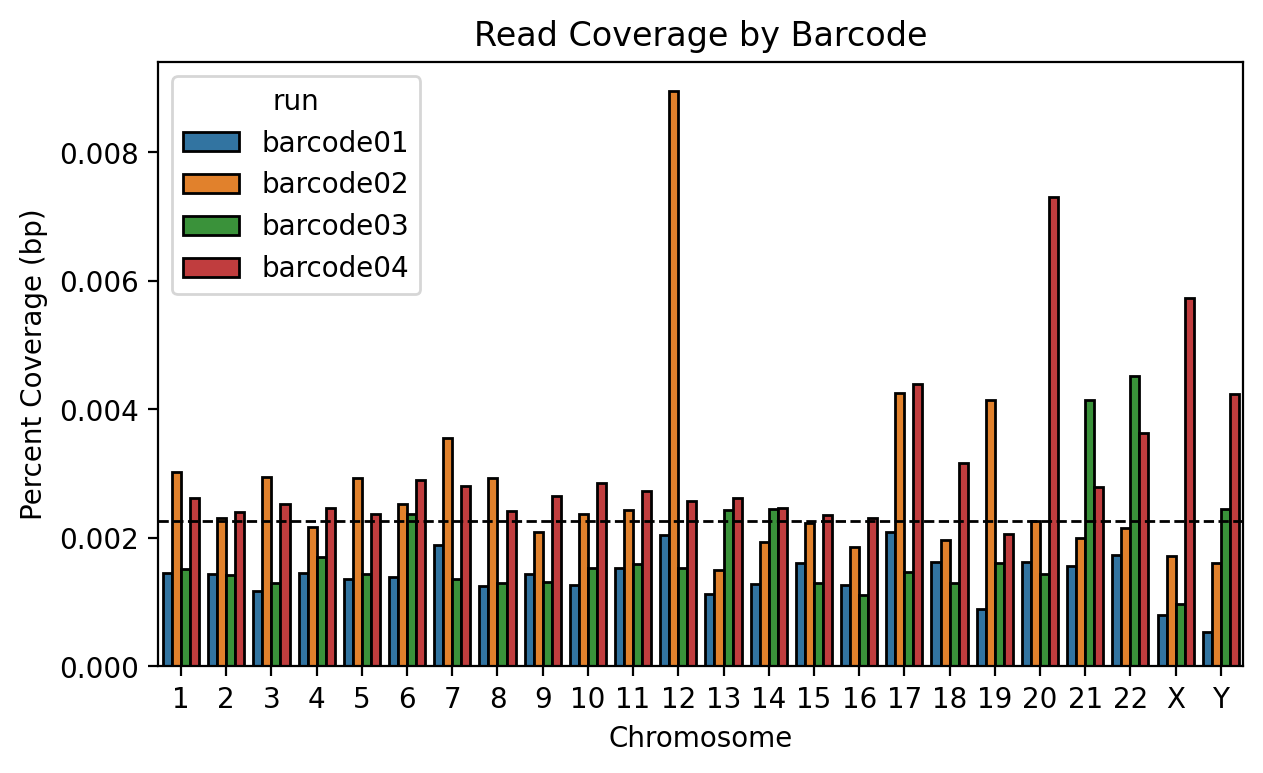

In [107]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 7, 4

tmp = df[df['rname'].str.contains("CM")]
mean_coverage = tmp['perc_coverage'].mean()

sns.barplot(data=tmp,
            x='Chromosome',
            y='perc_coverage',
            hue='run',
            edgecolor='k',
            fill=True) 

plt.axhline(y=mean_coverage, c='k', ls='--', lw=1)
plt.title("Read Coverage by Barcode")
plt.ylabel("Percent Coverage (bp)")
plt.xlabel("Chromosome")

Text(0.5, 0, 'Chromosome')

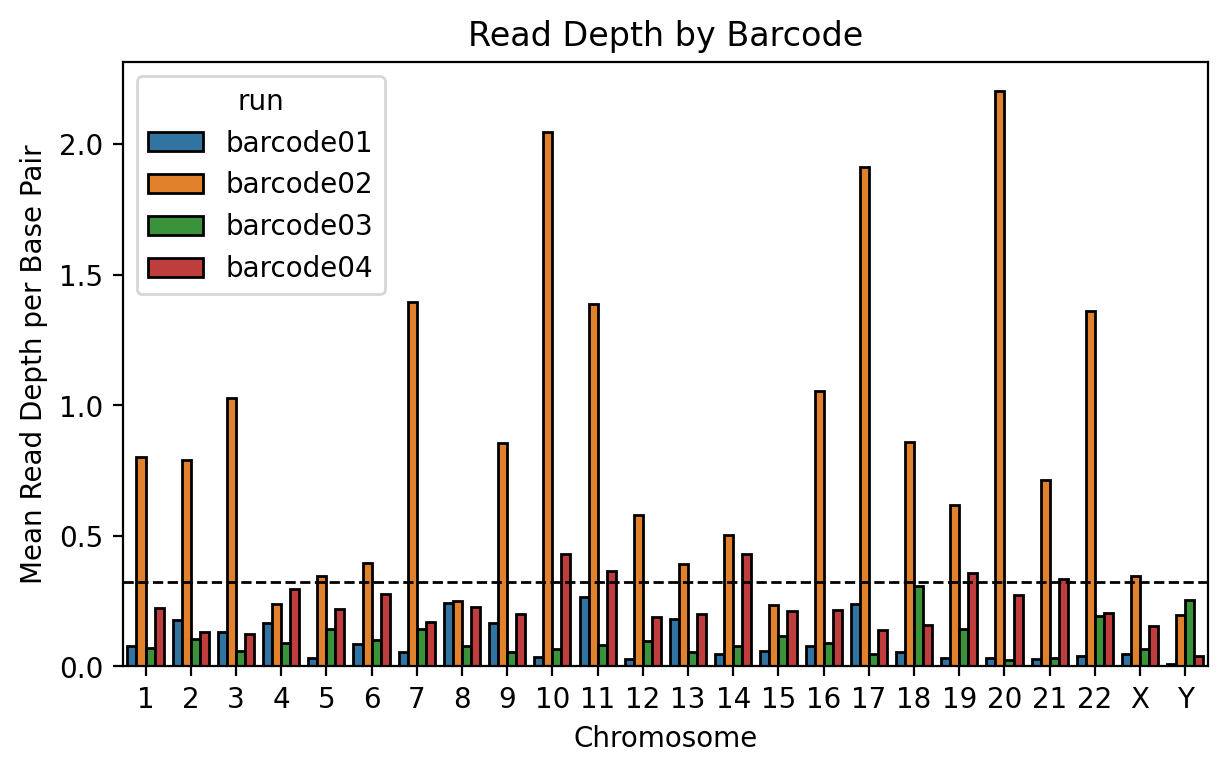

In [108]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 7, 4

tmp = df[df['rname'].str.contains("CM")]
mean_coverage = tmp['mean_depth_bp'].mean()

sns.barplot(data=tmp,
            x='Chromosome',
            y='mean_depth_bp',
            hue='run',
            edgecolor='k',
            fill=True) 

plt.axhline(y=mean_coverage, c='k', ls='--', lw=1)
plt.title("Read Depth by Barcode")
plt.ylabel("Mean Read Depth per Base Pair")
plt.xlabel("Chromosome")

# ALIGNMENT TABLE

In [113]:
root_dir = '/scratch/indikar_root/indikar1/shared_data/pipeline_test/'

paths = {
    'barcode01': f'{root_dir}barcode01_mm2_results/tables/alignment_table.csv',
    'barcode02': f'{root_dir}barcode02_mm2_results/tables/alignment_table.csv',
    'barcode03': f'{root_dir}barcode03_mm2_results/tables/alignment_table.csv',
    'barcode04': f'{root_dir}barcode04_mm2_results/tables/alignment_table.csv'
}

df_list = []

for k, v in paths.items():
    tmp = pd.read_csv(v)
    tmp['run'] = k
    df_list.append(tmp)
    
df = pd.concat(df_list, ignore_index=True)
print(df.shape)
df.head()


(4515853, 36)


,read_idx,align_idx,align_type,chrom,start,end,strand,read_name,read_length,read_start,...,perc_of_fragment,is_contained,align_start,align_end,Chromosome,Total length (bp),GenBank accession,RefSeq accession,fragment_midpoint,run
0,0,0,primary,CM000663.2,175933299,175934882,False,943761d4-b96c-44a1-a0af-b1c9b00d745a,3980,1640,...,100.000000,True,175933299,175934882,1,248956422.0,CM000663.2,\tNC_000001.11,175934423,barcode01
1,0,1,supplementary,CM000663.2,175933299,175934882,False,943761d4-b96c-44a1-a0af-b1c9b00d745a,3980,0,...,100.000000,True,175933299,175934882,1,248956422.0,CM000663.2,\tNC_000001.11,175934423,barcode01
2,0,2,supplementary,CM000663.2,175933299,175934058,False,943761d4-b96c-44a1-a0af-b1c9b00d745a,3980,0,...,100.000000,True,175933299,175934058,1,248956422.0,CM000663.2,\tNC_000001.11,175933436,barcode01
3,1,3,primary,CM000663.2,45033279,45033992,False,624d17bb-00aa-4583-882d-05b710a72a96,1638,22,...,89.220566,False,45033279,45033992,1,248956422.0,CM000663.2,\tNC_000001.11,45033755,barcode01
4,1,48,supplementary,CM000667.2,59401548,59402059,True,624d17bb-00aa-4583-882d-05b710a72a96,1638,0,...,87.750000,False,59401548,59402059,5,181538259.0,CM000667.2,\tNC_000005.10,59401699,barcode01


Text(0.5, 0, 'Percent Aligment (Sequence)')

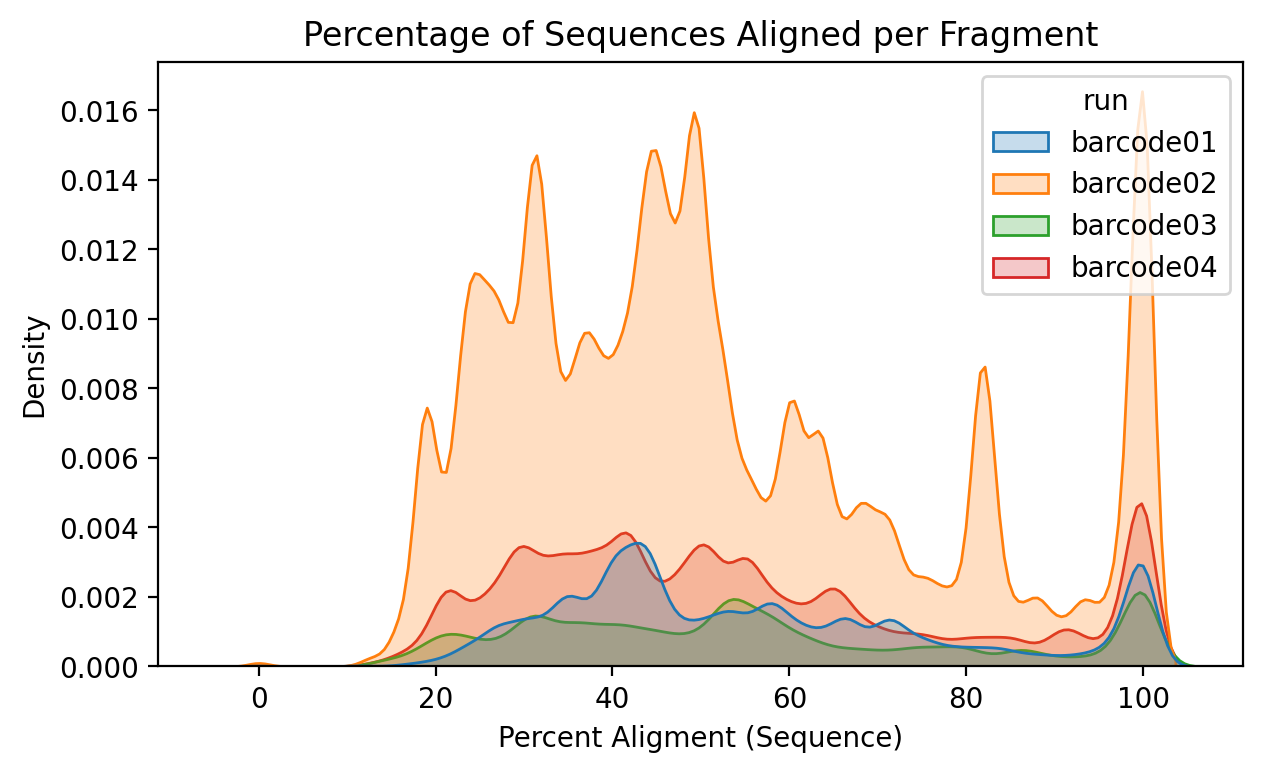

In [114]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 7, 4
sns.kdeplot(data=df,
            x='perc_of_alignment',
            hue='run',
            fill=True)

plt.title("Percentage of Sequences Aligned per Fragment")
plt.ylabel("Density")
plt.xlabel("Percent Aligment (Sequence)")

Text(0.5, 0, 'Percent Aligment (Fragment)')

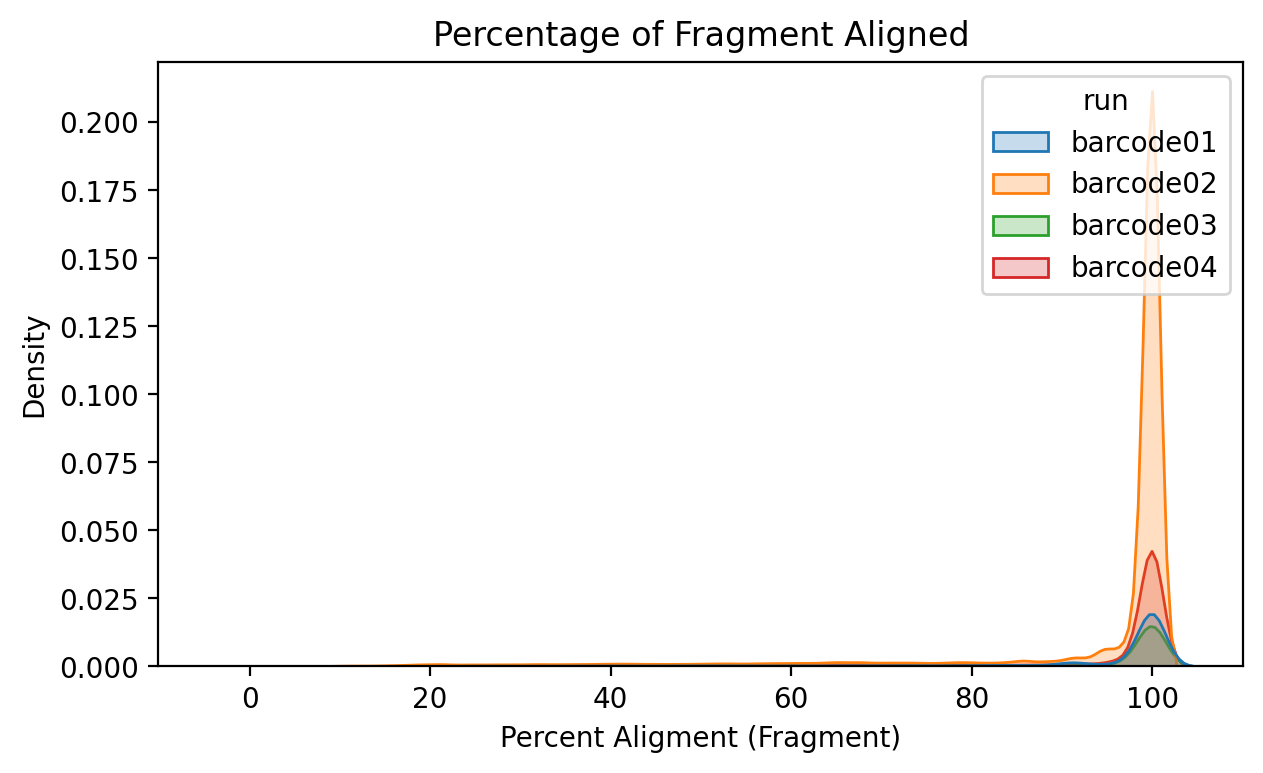

In [115]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 7, 4
sns.kdeplot(data=df,
            x='perc_of_fragment',
            hue='run',
            fill=True)

plt.title("Percentage of Fragment Aligned")
plt.ylabel("Density")
plt.xlabel("Percent Aligment (Fragment)")

# HYPERGRAPHS

In [116]:
root_dir = '/scratch/indikar_root/indikar1/shared_data/pipeline_test/'

paths = {
    'barcode01': f'{root_dir}barcode01_mm2_results/tables/incidence_table.csv',
    'barcode02': f'{root_dir}barcode02_mm2_results/tables/incidence_table.csv',
    'barcode03': f'{root_dir}barcode03_mm2_results/tables/incidence_table.csv',
    'barcode04': f'{root_dir}barcode04_mm2_results/tables/incidence_table.csv'
}

df_list = []

for k, v in paths.items():
    tmp = pd.read_csv(v)
    tmp['run'] = k
    df_list.append(tmp)
    
df = pd.concat(df_list, ignore_index=True)
print(df.shape)
df.head()

/sw/arcts/centos7/python3.8-anaconda/2020.07/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(942822, 7)


,read_name,cardinality,max_contact_distance,contact_midpoints,fragment_ids,chromosome,run
0,349c67aa-8ff8-4811-a21f-b7fa122e4af4,15,124058806,57720968;55648939;26505012;93962702;150497088;...,13419348;11539242;12431284;6386006;6385999;124...,20,barcode01
1,ad5b6c95-aa8e-4e92-99c9-06f6f4cfc273,15,187334606,60976460;26948410;26948245;36217639;62255828;3...,11048989;11392488;11392492;10474229;14110278;5...,1,barcode01
2,99650c38-566e-4d31-9c4c-7bda954191d8,15,189667426,189711100;9644833;44653;132267442;45452;189712...,3769666;14193439;9703933;14112265;6960816;1411...,4,barcode01
3,4280a63b-0cf9-4b2c-9b9b-5347441cfea5,14,173935188,979422;54972276;617478;875674;174552118;174552...,14284607;3964214;14318555;14309730;14241061;14...,19,barcode01
4,280fcf04-e725-41a9-9460-8db8fc492f9c,14,143494262,94286438;88661;95538862;150588;92056409;37680;...,7491449;4081530;585981;4081531;7699246;1387730...,2,barcode01


In [117]:
# drop sinlge node reads 
print(df.shape)
df = df[df['cardinality'] > 1]
print(df.shape)

(942822, 7)
(605404, 7)


In [118]:
get_min = lambda x : min([int(i) for i in x.split(";")])
df['min_first_node'] = df['contact_midpoints'].apply(get_min)
df[['read_name', 'min_first_node']].head()

,read_name,min_first_node
0,349c67aa-8ff8-4811-a21f-b7fa122e4af4,26440622
1,ad5b6c95-aa8e-4e92-99c9-06f6f4cfc273,108544
2,99650c38-566e-4d31-9c4c-7bda954191d8,44653
3,4280a63b-0cf9-4b2c-9b9b-5347441cfea5,617478
4,280fcf04-e725-41a9-9460-8db8fc492f9c,37680


<AxesSubplot:xlabel='chromosome', ylabel='cardinality'>

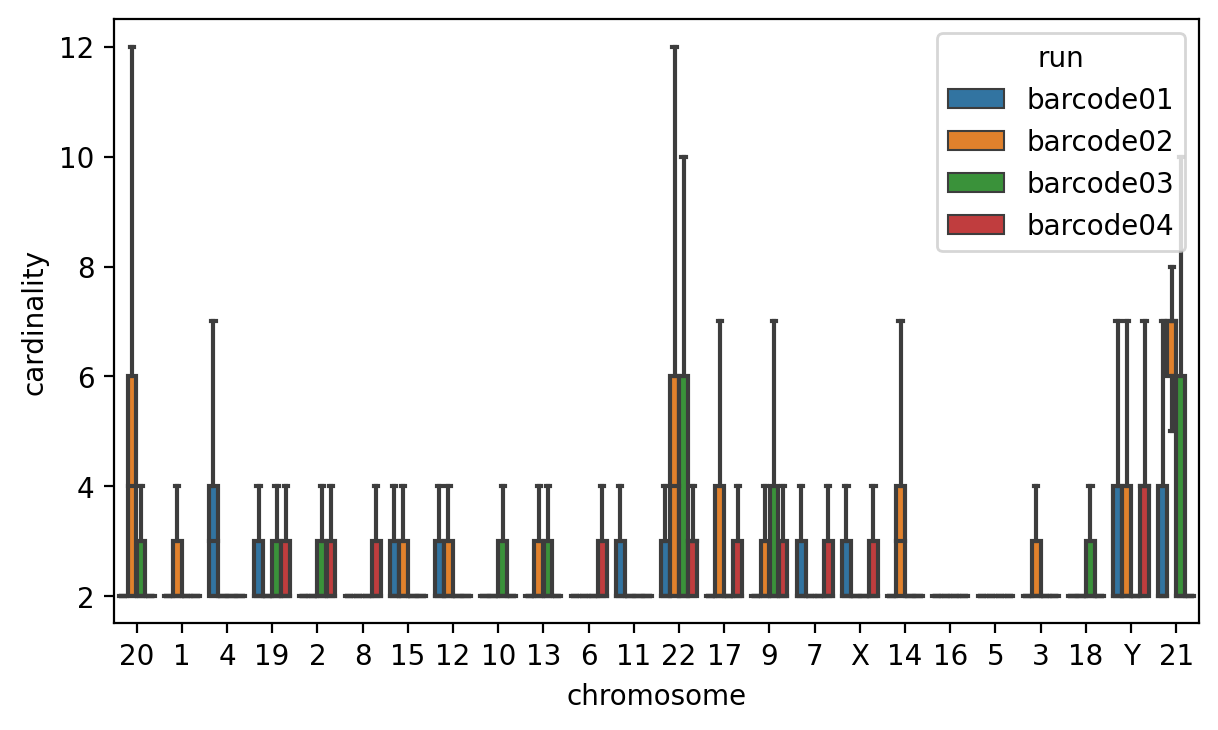

In [121]:
sns.boxplot(data=df,
            x='chromosome',
            y='cardinality',
            hue='run',
            showfliers=False)